<a href="https://colab.research.google.com/github/imaginaryBuddy/imdbMoviesDSAI/blob/main/EDA_on_first_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import numpy as np


#Yap Shen Hwei EDA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imdb =pd.read_csv("drive/My Drive/SC1015 Project TripleH/imdbTrain.csv")
imdb.head()
print()

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3933 non-null   int64  
 1   color                      3915 non-null   object 
 2   director_name              3854 non-null   object 
 3   num_critic_for_reviews     3891 non-null   float64
 4   duration                   3922 non-null   float64
 5   director_facebook_likes    3854 non-null   float64
 6   actor_3_facebook_likes     3913 non-null   float64
 7   actor_2_name               3922 non-null   object 
 8   actor_1_facebook_likes     3927 non-null   float64
 9   gross                      3241 non-null   float64
 10  genres                     3933 non-null   object 
 11  actor_1_name               3927 non-null   object 
 12  movie_title                3933 non-null   object 
 13  num_voted_users            3933 non-null   int64

# 1. EDA on **Color**

In [ ]:
color = pd.DataFrame(imdb["color"])
color.describe()

,color
count,3915
unique,2
top,Color
freq,3749


In [ ]:
color = pd.DataFrame(imdb["color"])
color.value_counts()

color           
Color               3749
 Black and White     166
dtype: int64

We will not be using color as a predictor of success because the dataset for color is highly imbalanced, with 3850 : 169 

# 2. EDA on director_name
   
```
  Clint Eastwood          18
  Woody Allen             18
  Steven Spielberg        16
  Renny Harlin            14
  Ridley Scott            13
  Steven Soderbergh       13

```








In [ ]:
director_name = pd.DataFrame(imdb["director_name"])
director_name.describe()

,director_name
count,3854
unique,2070
top,Steven Spielberg
freq,22


In [ ]:
director_name.value_counts().head(30)

director_name       
Steven Spielberg        22
Woody Allen             18
Clint Eastwood          17
Martin Scorsese         15
Spike Lee               15
Ridley Scott            15
Robert Zemeckis         12
Steven Soderbergh       12
Renny Harlin            12
Robert Rodriguez        11
Brian De Palma          11
Tim Burton              11
Oliver Stone            10
Richard Linklater       10
Francis Ford Coppola    10
David Fincher           10
Rob Reiner              10
Ron Howard              10
Kevin Smith              9
Paul W.S. Anderson       9
Stephen Frears           9
Richard Donner           9
Michael Bay              9
Chris Columbus           8
Martin Campbell          8
Sam Raimi                8
Tony Scott               8
Joel Schumacher          8
Shawn Levy               8
John Carpenter           8
dtype: int64

# 3. EDA on num_critic_for_reviews


In [ ]:
numCritic = pd.DataFrame(imdb[["movie_title", "num_critic_for_reviews"]]).dropna(how = "any", axis = 0)
numCritic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 3932
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             3891 non-null   object 
 1   num_critic_for_reviews  3891 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.2+ KB


In [ ]:
numCritic.sort_values("num_critic_for_reviews", ascending = False)

,movie_title,num_critic_for_reviews
3867,The Dark Knight Rises,813.0
1374,Prometheus,775.0
2939,Django Unchained,765.0
515,Skyfall,750.0
684,Mad Max: Fury Road,739.0
...,...,...
1934,Diamond Ruff,1.0
2241,The Sound and the Shadow,1.0
3690,Doc Holliday's Revenge,1.0
688,Vessel,1.0


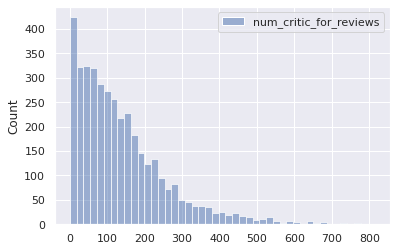

In [ ]:
sb.histplot(data = numCritic)

seems like a large proportion of movies receive close to 0 Number of critic reviews

let's look at the datas with the largest number of reviews 


In [ ]:
## not done yet 

# 4. EDA on duration 

In [ ]:
duration = pd.DataFrame(imdb["duration"]).dropna()
duration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  3922 non-null   float64
dtypes: float64(1)
memory usage: 61.3 KB


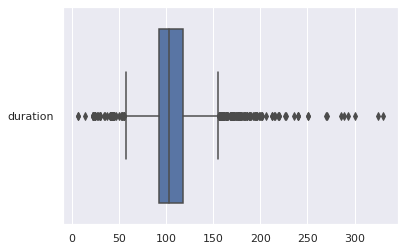

In [ ]:
sb.boxplot(data = duration, orient = "h") 

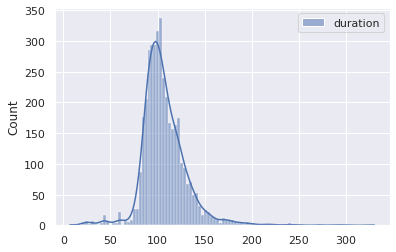

In [ ]:
sb.histplot(data = duration, kde = True)

In [ ]:
def remove_outliers(self):
  n = len(self)
  q1 = self.quantile(0.25)
  q3 = self.quantile(0.75)
  IQR = q3-q1
  lower = q1 - 1.5 * IQR 
  upper = q3 + 1.5 * IQR
  y = 0

  self = self[~((self < (q1 - 1.5 * IQR)) |(self > (q3 + 1.5 * IQR))).any(axis=1)]
  n2 = len(self)
  self.info()
  print()
  print("# of outliers: ", n - n2)

In [ ]:
remove_outliers(duration)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3732 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  3732 non-null   float64
dtypes: float64(1)
memory usage: 58.3 KB

# of outliers:  190


In [ ]:
# removing outliers from the duration data 
q1 = duration.quantile(0.25)
q3 = duration.quantile(0.75)
IQR = q3-q1
lower = q1 - 1.5 * IQR 
upper = q3 + 1.5 * IQR
y = 0

duration= duration[~((duration < (q1 - 1.5 * IQR)) |(duration > (q3 + 1.5 * IQR))).any(axis=1)]
duration.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3732 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  3732 non-null   float64
dtypes: float64(1)
memory usage: 58.3 KB


In [ ]:
duration.describe()

,duration
count,3732.000000
mean,105.492497
std,16.846563
min,58.000000
25%,93.000000
50%,103.000000
75%,116.000000
max,155.000000


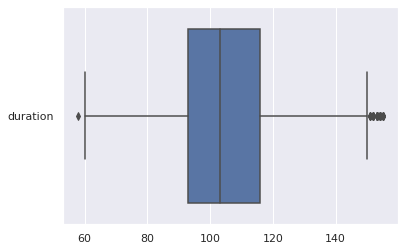

In [ ]:
sb.boxplot(data = duration, orient = "h")

skew:  duration    0.496461
dtype: float64


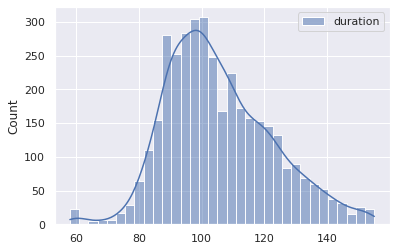

In [ ]:
sb.histplot(data = duration, kde = True)
print ("skew: " , duration.skew())

# 5. EDA on director_facebook_likes

In [ ]:
directorLikes = pd.DataFrame(imdb["director_facebook_likes"])
directorLikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   director_facebook_likes  3854 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


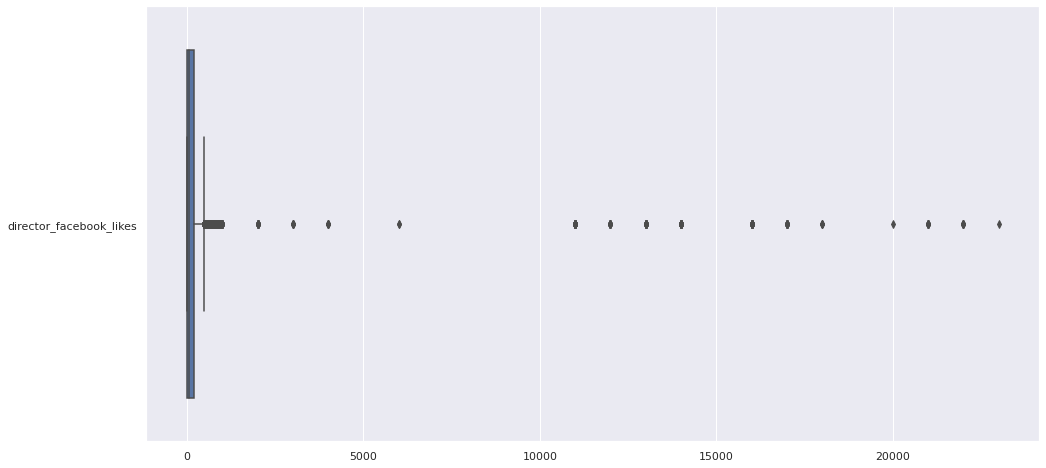

In [ ]:
f = plt.figure(figsize = (16,8))
sb.boxplot(data = directorLikes, orient = "h")

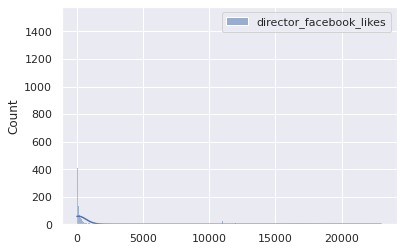

In [ ]:
sb.histplot(data = directorLikes, kde = True)

In [ ]:
# removing outliers 

In [ ]:
# note to self: need to remove outliers / check whether the outliers correspond to which data

# 6. EDA on genres

In [ ]:
genres = pd.DataFrame(imdb["genres"])
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  3933 non-null   object
dtypes: object(1)
memory usage: 30.9+ KB


In [ ]:
genres.head()

,genres
0,Comedy
1,Comedy|Musical
2,Drama|Horror|Mystery|Thriller
3,Action|Thriller
4,Animation|Drama


In [ ]:
# get the genre frequencies 
from collections import Counter
genreDi = Counter()

for strGenre in imdb["genres"] :
  wds = strGenre.split("|")
  for w in wds :
    if w in genreDi:
      genreDi[w] = genreDi[w] + 1
    else:
      genreDi[w] = 1 

print(genreDi)

Counter({'Drama': 2020, 'Comedy': 1461, 'Thriller': 1127, 'Action': 896, 'Romance': 866, 'Crime': 709, 'Adventure': 702, 'Sci-Fi': 469, 'Fantasy': 461, 'Horror': 436, 'Family': 429, 'Mystery': 388, 'Biography': 237, 'Animation': 186, 'War': 172, 'Music': 165, 'History': 154, 'Sport': 135, 'Musical': 105, 'Documentary': 94, 'Western': 78, 'Film-Noir': 6, 'Short': 5, 'News': 3, 'Reality-TV': 2, 'Game-Show': 1})


In [ ]:
# convert the dictionary into pandasdataframes + sort in descending order 

genreFreq = pd.DataFrame.from_records(genreDi.most_common(), columns = ["Genre", "Count"])

genreFreq.head()

,Genre,Count
0,Drama,2020
1,Comedy,1461
2,Thriller,1127
3,Action,896
4,Romance,866


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

<Figure size 7200x3600 with 0 Axes>

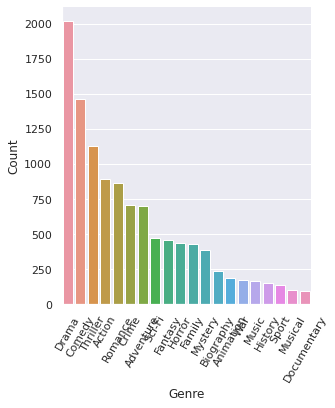

In [ ]:
f = plt.figure(figsize = (100,50))
sb.catplot(data = genreFreq[:20], y = "Count", x = "Genre", kind = "bar")
plt.xticks(rotation=60)

In [ ]:
# the most common genre seems to be Drama, 
# hypothesis: assuming that the movies industry follows the demand and supply notion, there is high demand for Dramas, 
# so this genre will be the most popular with the highest ratings amngs the other genres

In [ ]:
# Qn: how to extract this le? 

# Genre vs imdb_score

qn: do we included repeated movies with different genres??? 

In [ ]:
from collections import defaultdict
values = defaultdict(list)
for ind, row in imdb.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['imdb_score'])
        
        
genre_lst, score_lst = [], []
for key, item in values.items():
    if key not in [0, 1]:
        genre_lst.append(key)
        score_lst.append(np.mean(item))
        
        
genres_with_score = pd.DataFrame([genre_lst, score_lst]).T
genres_with_score.columns = ['Genre', 'Mean_score']
genres_with_score.sort_values("Mean_score", ascending = False, inplace = True, axis = 0)
genres_with_score.head()

,Genre,Mean_score
21,Film-Noir,7.633333
24,News,7.533333
14,Documentary,7.205319
16,Biography,7.124895
19,History,7.064286


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

<Figure size 7200x3600 with 0 Axes>

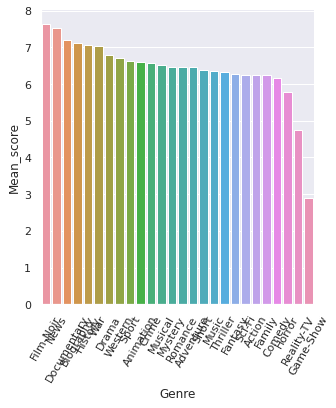

In [ ]:
f = plt.figure(figsize = (100,50))
sb.catplot(data = genres_with_score, y = "Mean_score", x = "Genre", kind = "bar")
plt.xticks(rotation=60)

In [ ]:
# seems like drama is placed 7th place in terms of mean_score 

In [ ]:
# need to check the distribution of film noir 

# Genres vs Gross 

In [ ]:
from collections import defaultdict
values = defaultdict(list)
imdb_clean = imdb[['genres', 'gross']].dropna(how = "any", axis = 0)
for ind, row in imdb_clean.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['gross'])
        
        
di = dict()
for key, item in values.items():
    if key not in di:
        di[key] = np.mean(item)
        
       
genres_with_meangross = pd.DataFrame.from_dict(di, orient = "index").reset_index().\
                        rename(columns = {"index": "Genre", 0 :"meanGross"}).sort_values("meanGross", ascending = False)
genres_with_meangross.head()

,Genre,meanGross
2,Animation,1.131680e+08
5,Adventure,9.793229e+07
6,Family,9.111374e+07
7,Fantasy,8.406015e+07
17,Sci-Fi,8.137268e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

<Figure size 7200x3600 with 0 Axes>

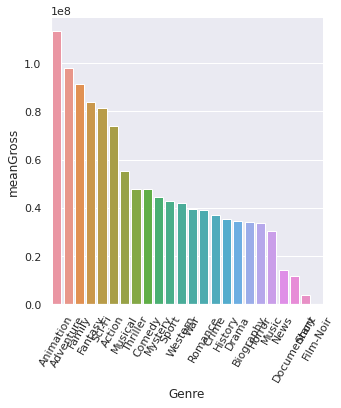

In [ ]:
f = plt.figure(figsize = (100,50))
sb.catplot(data = genres_with_meangross, y = "meanGross", x = "Genre", kind = "bar")
plt.xticks(rotation=60)

In [ ]:
# seems like animation makes the most money, then why do people make so many dramas, maybe it's cheaper?, can compare using jointplot/boxplot of smtg (need to think) 
# let's explore genres vs popularity of the movie 
# need to calculate profit. 

# Genres vs num_user_for_reviews 



In [ ]:
genreuser_df = imdb[['genres', 'num_user_for_reviews']].copy()
genreuser_df.dropna(how = "any", axis = 0, inplace = True)
genreuser_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3915 entries, 0 to 3932
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                3915 non-null   object 
 1   num_user_for_reviews  3915 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.8+ KB


question: why is it 0 to 4033? 

In [ ]:
genreuser_df.head()

,genres,num_user_for_reviews
0,Comedy,8.0
1,Comedy|Musical,48.0
2,Drama|Horror|Mystery|Thriller,6.0
3,Action|Thriller,18.0
4,Animation|Drama,15.0


In [ ]:
values = defaultdict(list)
for ind, row in genreuser_df.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['num_user_for_reviews'])
        
        
di = dict()
for key, item in values.items():
    if key not in di:
        di[key] = np.mean(item)
        
       
genreUser= pd.DataFrame.from_dict(di, orient = "index").reset_index().\
                        rename(columns = {"index": "Genre", 0 :"meanNum"}).sort_values("meanNum", ascending = False)
genreUser.head()

,Genre,meanNum
17,Sci-Fi,460.599147
9,Adventure,422.508547
6,Action,388.755034
11,Fantasy,355.707158
4,Mystery,336.754522


# Genres vs movie_facebook_likes 

In [ ]:
from collections import defaultdict
values = defaultdict(list)
imdb_clean = imdb[['genres', 'movie_facebook_likes']].dropna(how = "any", axis = 0)
for ind, row in imdb_clean.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['movie_facebook_likes'])
        
        
di = dict()
for key, item in values.items():
    if key not in di:
        di[key] = np.mean(item)
        
       
genresLikes = pd.DataFrame.from_dict(di, orient = "index").reset_index().\
                        rename(columns = {"index": "Genre", 0 :"meanLikes"}).sort_values("meanLikes", ascending = False)
genresLikes.head()

,Genre,meanLikes
17,Sci-Fi,13741.394456
9,Adventure,13051.772080
11,Fantasy,10958.444685
16,Biography,10625.561181
6,Action,10280.497768


Sci-Fi is the most popular type of movie, in terms of popularity, maybe we can take a look at their correlation, let's plot a correlation map

In [ ]:
# combine the dfs, and get the correlation bw meanLikes and 
numRev_likes = pd.concat([genresLikes["Genre"],genresLikes["meanLikes"], genreUser["meanNum"]], axis = 1, join = 'outer')
numRev_likes.head()

,Genre,meanLikes,meanNum
0,Comedy,4827.938398,183.452610
1,Musical,3614.228571,237.523810
2,Drama,7608.262871,252.581222
3,Horror,6275.011468,298.756322
4,Mystery,8473.074742,336.754522


In [ ]:
#sanity check that they are indeed concatenated by index 
genresLikes.loc[12]


Genre             Crime
meanLikes    6997.06488
Name: 12, dtype: object

In [ ]:
genreUser.loc[12]


Genre           Crime
meanNum    256.558865
Name: 12, dtype: object

In [ ]:
numRev_likes.loc[12]

Genre             Crime
meanLikes    6997.06488
meanNum      256.558865
Name: 12, dtype: object

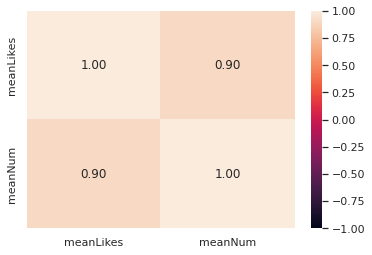

In [ ]:
sb.heatmap(numRev_likes.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

yay, we have found a strong correlation between number of reviews and number of likes. We may use this correlation in the future, but for now, this is just an EDA 

# Genres vs num_critic_for_reviews

num_critic_for_reviews, num_user_for_reviews and movie_facebook_likes have positive correlation to each other. We can use these as indicators of "popularity"

In [ ]:
values = defaultdict(list)
imdb_clean = imdb[['genres', 'num_critic_for_reviews']].dropna(how = "any", axis = 0)
for ind, row in imdb_clean.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['num_critic_for_reviews'])
        
        
di = dict()
for key, item in values.items():
    if key not in di:
        di[key] = np.mean(item)
        
       
genresLikes = pd.DataFrame.from_dict(di, orient = "index").reset_index().\
                        rename(columns = {"index": "Genre", 0 :"meanNumCritics"}).sort_values("meanNumCritics", ascending = False)
genresLikes.head()

,Genre,meanNumCritics
17,Sci-Fi,190.823028
9,Adventure,182.833333
6,Action,170.493841
4,Mystery,166.665803
11,Fantasy,165.632609


# duration vs imdb_score



```
# correlation is low at 0.27, likely to not have any correlation.
# however, still good to take into account of the median, meaning that that is the duration where most directors will aim for. 
```




In [ ]:
duration_w_score = imdb[["duration", "imdb_score"]].copy()
duration_w_score.dropna(inplace = True, axis = 0, how = "any") #remove NaN
duration_w_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922 entries, 0 to 3932
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   duration    3922 non-null   float64
 1   imdb_score  3922 non-null   float64
dtypes: float64(2)
memory usage: 91.9 KB


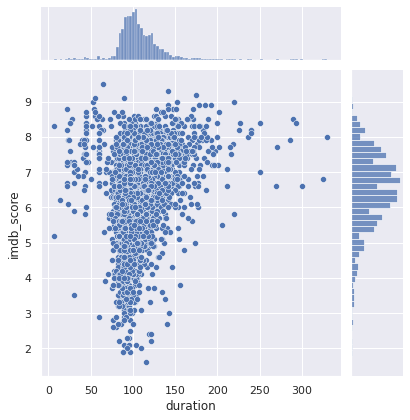

In [ ]:
sb.jointplot(data = duration_w_score, x = "duration", y = "imdb_score")

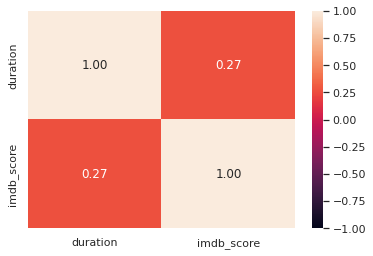

In [ ]:
sb.heatmap(duration_w_score.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

# duration vs popularity 

## duration vs movie_facebook_likes

In [ ]:
duration_w_fb = imdb[["duration", "movie_facebook_likes"]].copy()
duration_w_fb.dropna(inplace = True, axis = 0, how = "any")
duration_w_fb.info()
print()
duration_w_fb.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922 entries, 0 to 3932
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   duration              3922 non-null   float64
 1   movie_facebook_likes  3922 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 91.9 KB



,duration,movie_facebook_likes
duration,1.000000,0.203145
movie_facebook_likes,0.203145,1.000000


In [ ]:
# it seems like there isn't much correlation, maybe we can extract the top 1000 movie_facebook_likes and see whether we could get anything

In [ ]:
duration_w_fb.sort_values(by = "movie_facebook_likes", ascending = False, inplace = True)
duration_w_fb.reset_index()
duration_w_fb.iloc[:1000].corr()

,duration,movie_facebook_likes
duration,1.000000,0.180237
movie_facebook_likes,0.180237,1.000000


it seems like, among the top 1000, there is a relatively positive correlation, let's see whether its the same for the other ranges, excluding the 0 fb likes and movies with less than 10000 likes 

In [ ]:
duration_w_fb.iloc[1000:2000].corr()

,duration,movie_facebook_likes
duration,1.000000,0.126276
movie_facebook_likes,0.126276,1.000000


In [ ]:
duration_w_fb.iloc[2000:3000].corr()

,duration,movie_facebook_likes
duration,1.000000,-0.119052
movie_facebook_likes,-0.119052,1.000000


# director_facebook_likes vs score

In [ ]:
dir_likes_score = imdb[["director_facebook_likes", "imdb_score"]].copy()
dir_likes_score.dropna(axis = 0, how = "any", inplace = True)
dir_likes_score.head()

,director_facebook_likes,imdb_score
0,9.0,5.2
1,19.0,5.8
2,15.0,4.1
3,0.0,3.2
4,3.0,6.9


In [ ]:
# bin imdb_score into categories 

# movie_facebook_likes

# Drafts 

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = "https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/"

r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'html.parser')

table = soup.find('table')
rows = table.tbody.findAll('tr');

years = []
cpis = []

for row in rows:
    year = row.findAll('td')[0].get_text()
    if year.isdigit() and int(year) < 2022:
        years.append(int(year))
        cpis.append(float(row.findAll('td')[13].get_text()))

cpi_table = pd.DataFrame({
    "year": years,
    "avg_annual_cpi": cpis
})

cpi_table.tail()

,year,avg_annual_cpi
104,2017,245.120
105,2018,251.107
106,2019,255.657
107,2020,258.811
108,2021,270.970


# Multivariate **Logistic** Regression 

In [ ]:
import sklearn

In [ ]:
def f(row):
    if row['imdb_score'] >= 6.6:
        rating = "good"
    else:
        rating = "bad"
    return rating

In [ ]:
# define the dataset 
imdb_clean = imdb[[ "num_critic_for_reviews", "director_facebook_likes", "num_user_for_reviews", "imdb_score"]].dropna(inplace = False, how = "any", axis = 0).reset_index()
imdb_clean['imdb_goodbad'] = imdb_clean.apply(f, axis=1)
X,y = imdb_clean[["num_critic_for_reviews", "director_facebook_likes", "num_user_for_reviews"]], imdb_clean[["imdb_goodbad"]]

In [ ]:
imdb_clean.head()

,index,num_critic_for_reviews,director_facebook_likes,num_user_for_reviews,imdb_score,imdb_goodbad
0,0,16.0,9.0,8.0,5.2,bad
1,1,11.0,19.0,48.0,5.8,bad
2,2,15.0,15.0,6.0,4.1,bad
3,3,8.0,0.0,18.0,3.2,bad
4,4,51.0,3.0,15.0,6.9,good


In [ ]:
X.isnull().sum()

num_critic_for_reviews     0
director_facebook_likes    0
num_user_for_reviews       0
dtype: int64

In [ ]:
y.isnull().sum()

imdb_goodbad    0
dtype: int64

In [ ]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# split the dataset into train and validation 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2 )
# define the multinomial logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predlr = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predlr)

0.6282722513089005

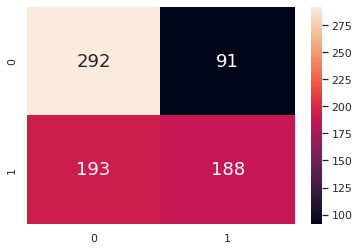

In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predlr)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test) 

In [ ]:
logreg.fit(X_train_s, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predlr2 = logreg.predict(X_test_s)

In [ ]:
accuracy_score(y_test, y_predlr2)

0.6282722513089005

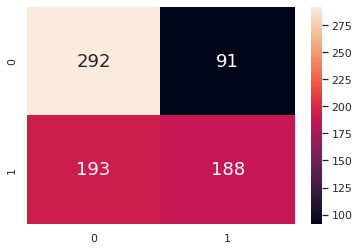

In [ ]:
cm2 = confusion_matrix(y_test, y_predlr2)
sb.heatmap(cm2, annot = True, fmt=".0f", annot_kws={"size": 18})

## Multiclass Logistic Regression 

In [ ]:
imdb_bins = [0, 3, 5, 7, 10] 
imdb_labels = ["horrendous","bad", "good", "very good"]
imdb_clean["score_cat"] = pd.cut(imdb_clean["imdb_score"].copy(), \
                                     bins = imdb_bins, labels = imdb_labels)
imdb_clean.head()
    

,index,num_critic_for_reviews,director_facebook_likes,num_user_for_reviews,imdb_score,imdb_goodbad,score_cat
0,0,16.0,9.0,8.0,5.2,bad,good
1,1,11.0,19.0,48.0,5.8,bad,good
2,2,15.0,15.0,6.0,4.1,bad,bad
3,3,8.0,0.0,18.0,3.2,bad,bad
4,4,51.0,3.0,15.0,6.9,good,good


In [ ]:
X_multi, y_multi = imdb_clean[["num_critic_for_reviews", "director_facebook_likes", "num_user_for_reviews"]], imdb_clean[["score_cat"]]

In [ ]:
# split the dataset into train and validation 
X_train_multi, X_test_multi, y_train_multi, y_test_multi = sklearn.model_selection.train_test_split(X_multi, y_multi, test_size = 0.2 )
# define the multinomial logistic regression model
logreg2 = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs')
logreg2.fit(X_train_multi, y_train_multi)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

In [ ]:
y_predlr_multi = logreg2.predict(X_test_multi)

In [ ]:
accuracy_score(y_test_multi, y_predlr_multi)

0.6191099476439791

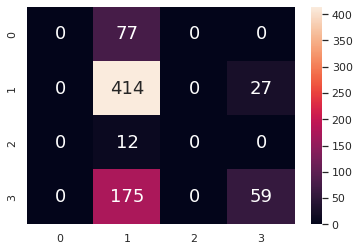

In [ ]:
cm_multi = confusion_matrix(y_test_multi, y_predlr_multi)
sb.heatmap(cm_multi, annot = True, fmt=".0f", annot_kws={"size": 18})

# Multivariate **Logistic** Regression 

In [ ]:
import sklearn

In [ ]:
def f(row):
    if row['imdb_score'] >= 6.6:
        rating = "good"
    else:
        rating = "bad"
    return rating

In [ ]:
# define the dataset 
imdb_clean = imdb[[ "num_critic_for_reviews", "director_facebook_likes", "num_user_for_reviews", "imdb_score"]].dropna(inplace = False, how = "any", axis = 0).reset_index()
imdb_clean['imdb_goodbad'] = imdb_clean.apply(f, axis=1)
X,y = imdb_clean[["num_critic_for_reviews", "director_facebook_likes", "num_user_for_reviews"]], imdb_clean[["imdb_goodbad"]]

In [ ]:
imdb_clean.head()

,index,num_critic_for_reviews,director_facebook_likes,num_user_for_reviews,imdb_score,imdb_goodbad
0,0,16.0,9.0,8.0,5.2,bad
1,1,11.0,19.0,48.0,5.8,bad
2,2,15.0,15.0,6.0,4.1,bad
3,3,8.0,0.0,18.0,3.2,bad
4,4,51.0,3.0,15.0,6.9,good


In [ ]:
X.isnull().sum()

num_critic_for_reviews     0
director_facebook_likes    0
num_user_for_reviews       0
dtype: int64

In [ ]:
y.isnull().sum()

imdb_goodbad    0
dtype: int64

In [ ]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# split the dataset into train and validation 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2 )
# define the multinomial logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predlr = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predlr)

0.6282722513089005

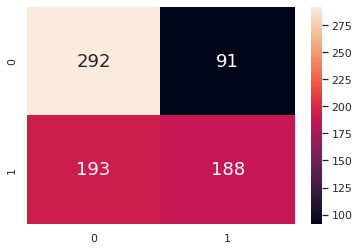

In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predlr)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test) 

In [ ]:
logreg.fit(X_train_s, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predlr2 = logreg.predict(X_test_s)

In [ ]:
accuracy_score(y_test, y_predlr2)

0.6282722513089005

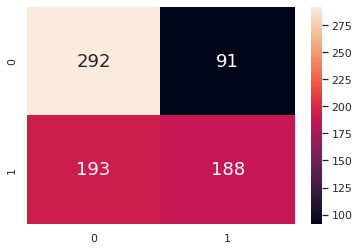

In [ ]:
cm2 = confusion_matrix(y_test, y_predlr2)
sb.heatmap(cm2, annot = True, fmt=".0f", annot_kws={"size": 18})

## Multiclass Logistic Regression 

In [ ]:
imdb_bins = [0, 3, 5, 7, 10] 
imdb_labels = ["horrendous","bad", "good", "very good"]
imdb_clean["score_cat"] = pd.cut(imdb_clean["imdb_score"].copy(), \
                                     bins = imdb_bins, labels = imdb_labels)
imdb_clean.head()
    

,index,num_critic_for_reviews,director_facebook_likes,num_user_for_reviews,imdb_score,imdb_goodbad,score_cat
0,0,16.0,9.0,8.0,5.2,bad,good
1,1,11.0,19.0,48.0,5.8,bad,good
2,2,15.0,15.0,6.0,4.1,bad,bad
3,3,8.0,0.0,18.0,3.2,bad,bad
4,4,51.0,3.0,15.0,6.9,good,good


In [ ]:
X_multi, y_multi = imdb_clean[["num_critic_for_reviews", "director_facebook_likes", "num_user_for_reviews"]], imdb_clean[["score_cat"]]

In [ ]:
# split the dataset into train and validation 
X_train_multi, X_test_multi, y_train_multi, y_test_multi = sklearn.model_selection.train_test_split(X_multi, y_multi, test_size = 0.2 )
# define the multinomial logistic regression model
logreg2 = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs')
logreg2.fit(X_train_multi, y_train_multi)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

In [ ]:
y_predlr_multi = logreg2.predict(X_test_multi)

In [ ]:
accuracy_score(y_test_multi, y_predlr_multi)

0.6191099476439791

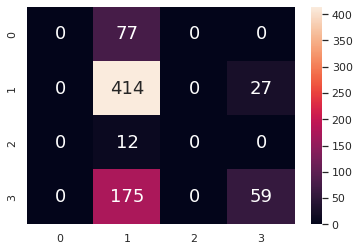

In [ ]:
cm_multi = confusion_matrix(y_test_multi, y_predlr_multi)
sb.heatmap(cm_multi, annot = True, fmt=".0f", annot_kws={"size": 18})